# Objective

data analysis using sql to identify the variables affecting the cancellation for the hotel bookings and finding the steps to be taken to lower the 
cancellation in the bookings that will improve the profit for the company

In [3]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import mysql.connector as connector

In [7]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import warnings
warnings.filterwarnings("ignore")

# Importing Database

In [9]:
import os

In [12]:
mydb= connector.connect(
    host = "localhost",
    user= "root",
    password = "sureshraina@18",
    auth_plugin = "mysql_native_password")

In [14]:
mycursor = mydb.cursor()

In [16]:
mycursor.execute("USE hotel_bookings")

In [18]:
mycursor.execute("SHOW TABLES")

In [20]:
tables = mycursor.fetchall()

In [22]:
print(tables)

[('hotel_bookings_table',)]


In [30]:
query = "SELECT * FROM hotel_bookings_table"
data_1 = pd.read_sql(query,con= mydb)

In [32]:
data_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,None,None,0,Transient,0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,None,None,0,Transient,75,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,None,0,Transient,75,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,None,0,Transient,98,0,1,Check-Out,3/7/2015


# Data Cleaning 

In [220]:
data_1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [37]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   hotel                           119386 non-null  object
 1   is_canceled                     119386 non-null  int64 
 2   lead_time                       119386 non-null  int64 
 3   arrival_date_year               119386 non-null  int64 
 4   arrival_date_month              119386 non-null  object
 5   arrival_date_week_number        119386 non-null  int64 
 6   arrival_date_day_of_month       119386 non-null  int64 
 7   stays_in_weekend_nights         119386 non-null  int64 
 8   stays_in_week_nights            119386 non-null  int64 
 9   adults                          119386 non-null  int64 
 10  children                        119386 non-null  int64 
 11  babies                          119386 non-null  int64 
 12  meal                          

In [39]:
data_structure = data_1.shape
print("Number of rows present in the dataset are {}".format(data_structure[0]))
print("Number of columns present in the dataset are {}".format(data_structure[1]))

Number of rows present in the dataset are 119386
Number of columns present in the dataset are 32


In [41]:
data_1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [43]:
data_1["reservation_status_date"] = pd.DatetimeIndex(data_1["reservation_status_date"])

In [45]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119386 entries, 0 to 119385
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119386 non-null  object        
 1   is_canceled                     119386 non-null  int64         
 2   lead_time                       119386 non-null  int64         
 3   arrival_date_year               119386 non-null  int64         
 4   arrival_date_month              119386 non-null  object        
 5   arrival_date_week_number        119386 non-null  int64         
 6   arrival_date_day_of_month       119386 non-null  int64         
 7   stays_in_weekend_nights         119386 non-null  int64         
 8   stays_in_week_nights            119386 non-null  int64         
 9   adults                          119386 non-null  int64         
 10  children                        119386 non-null  int64  

In [47]:
data_1.describe(include= "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
count,119386,119386,119386,118898,119386,119386,119386,119386,119386,103048,6797,119386,119386
unique,2,12,5,177,7,5,10,12,3,333,352,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,9,40,Transient,Check-Out
freq,79326,13873,92306,48586,56476,97870,85994,74053,104637,31960,927,89613,75166


# checking the unique values for all the categorical columns in the dataset

In [50]:
for x in data_1.describe(include="object").columns:
    print(x)
    print(data_1[x].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' None 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'I

In [51]:
data_1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16338
company         

In [52]:
# we can remove the agent and company column becuase of no use as weel as 75% of data is null in this columns so we cannot remove that rows only

In [56]:
data_1 = data_1.drop(columns=["agent","company"],axis=1)

In [58]:
data_1.dropna(axis= 0, how = "any",inplace=True)

In [60]:
data_1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [62]:
data_1.shape

(118898, 30)

# statistical analysis

In [65]:
data_1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.027217,0.061885,0.571683,2016-07-31 20:49:36.695991552
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-12-09 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.490949,0.244172,0.792678,NaN


# Outliers Detection for Adr column

<Axes: xlabel='adr'>

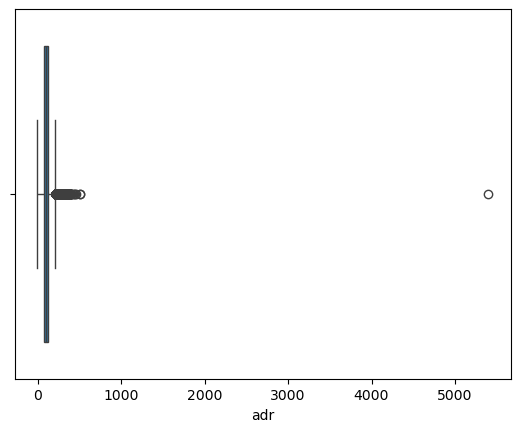

In [68]:
sns.boxplot(data= data_1, x="adr")

Here we can see their is the one big outlier there so we have to remove that by using quantile method

In [70]:
q1 = data_1["adr"].quantile(0.25)
q3 = data_1["adr"].quantile(0.75)

In [73]:
iqr = q3-q1

In [75]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)

In [77]:
data_1[(data_1["adr"] > upper_limit) | (data_1["adr"] < lower_limit)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
140,Resort Hotel,0,44,2015,July,28,5,2,0,3,...,G,3,No Deposit,0,Transient,225,2,0,Check-Out,2015-07-07
303,Resort Hotel,0,79,2015,July,28,11,2,6,2,...,G,1,No Deposit,0,Transient,214,0,0,Check-Out,2015-07-19
396,Resort Hotel,0,317,2015,July,29,14,1,5,2,...,G,1,No Deposit,0,Transient,231,1,2,Check-Out,2015-07-20
412,Resort Hotel,0,37,2015,July,29,15,2,6,2,...,H,0,No Deposit,0,Transient,216,1,0,Check-Out,2015-07-23
523,Resort Hotel,0,0,2015,July,29,18,0,1,2,...,C,0,No Deposit,0,Transient,249,0,0,Check-Out,2015-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119247,City Hotel,0,140,2017,August,35,27,2,3,2,...,F,0,No Deposit,0,Transient,235,0,0,Check-Out,2017-01-09
119285,City Hotel,0,25,2017,August,35,30,0,3,3,...,F,1,No Deposit,0,Transient,236,0,3,Check-Out,2017-02-09
119335,City Hotel,0,110,2017,August,35,29,0,5,3,...,D,1,No Deposit,0,Transient,229,0,1,Check-Out,2017-03-09
119361,City Hotel,0,54,2017,August,35,27,3,5,1,...,G,0,No Deposit,0,Transient,267,0,1,Check-Out,2017-04-09


As lower limit is not going to make impact on Average Daily Rating for hotels so we only remove the upper ones

In [80]:
data_1.loc[data_1["adr"] > upper_limit,"adr"] = upper_limit

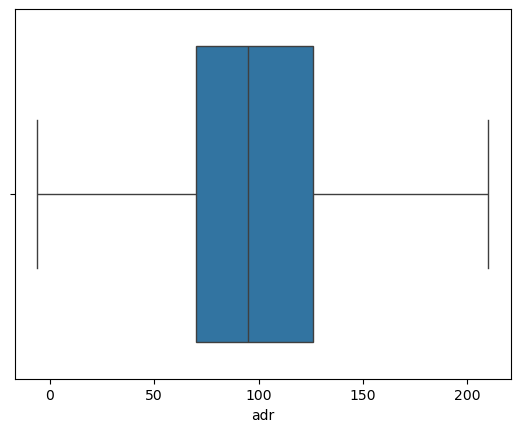

In [82]:
sns.boxplot(data= data_1,x = "adr")
plt.show()

# Data Analysis and Visulization

In [85]:
cancelled_pect = data_1["is_canceled"].value_counts(normalize=True)

In [87]:
print("Percentage of booking cancellation is {}".format(cancelled_pect[1]*100))

Percentage of booking cancellation is 37.13519150868812


# Reservation Status Count Plot

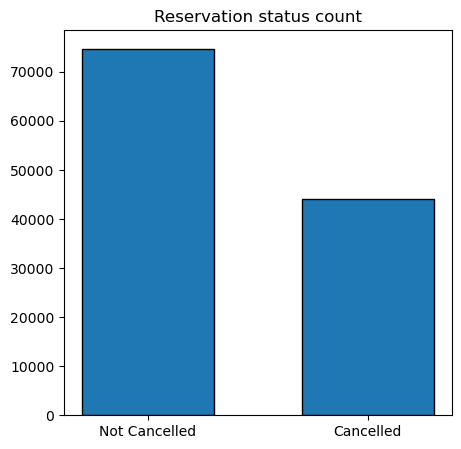

In [90]:
plt.figure(figsize = (5,5))
plt.title("Reservation status count")
plt.bar(["Not Cancelled","Cancelled"],data_1["is_canceled"].value_counts(),width=0.6,edgecolor="k")
plt.show()

# hotel type cancellation count 

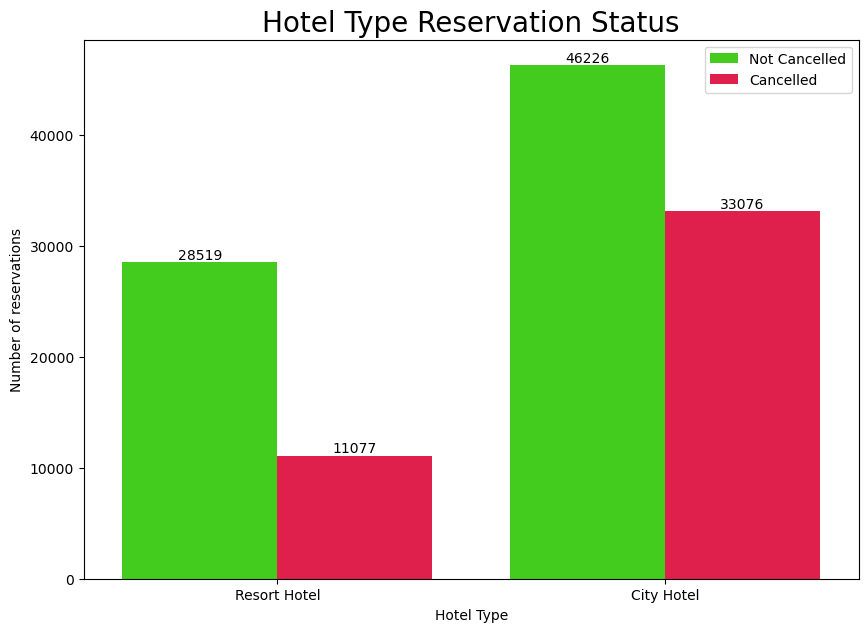

In [93]:
plt.figure(figsize = (10,7))
ax_1 = sns.countplot(data = data_1, x= "hotel",hue="is_canceled",palette = "prism")
for x in ax_1.containers :
    ax_1.bar_label(x)
plt.title("Hotel Type Reservation Status",size=20)
plt.xlabel("Hotel Type")
plt.ylabel("Number of reservations")
plt.legend(["Not Cancelled","Cancelled"])

In [95]:
data_1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [97]:
resort_hotels = data_1[data_1["hotel"]== "Resort Hotel"]

In [105]:
cancelled_re_per = resort_hotels["is_canceled"].value_counts(normalize = True)

In [117]:
print("Cancellation % for resort hotels is {}".format(round(cancelled_re_per[1]*100,2)))
print("Cancellation % for city hotels is {}".format(round(cancelled_ci_per[1]*100,2)))

Cancellation % for resort hotels is 27.98
Cancellation % for city hotels is 41.71


In [113]:
city_hotels = data_1[data_1["hotel"]== "City Hotel"]

In [115]:
cancelled_ci_per = city_hotels["is_canceled"].value_counts(normalize = True)

# Average Daily Rate Across Timeline by Hotel Type

In [120]:
resort_hotels_gr = resort_hotels.groupby(["reservation_status_date"]).agg({"adr":"mean"})

In [122]:
city_hotels_gr = city_hotels.groupby(["reservation_status_date"]).agg({"adr":"mean"})

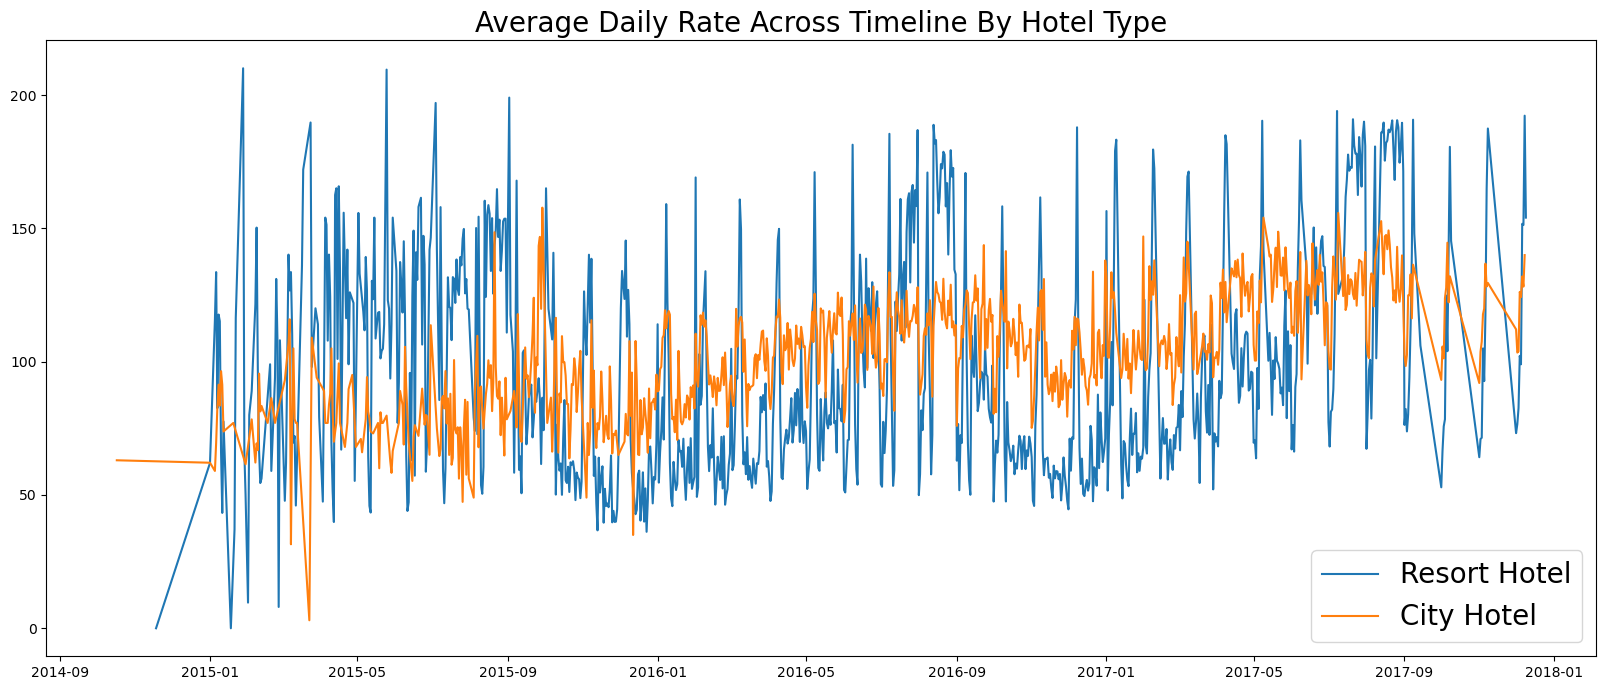

In [140]:
plt.figure(figsize = (20,8))
plt.plot(resort_hotels_gr.index, resort_hotels_gr["adr"],label = "Resort Hotel")
plt.plot(city_hotels_gr.index, city_hotels_gr["adr"],label = "City Hotel")
plt.legend(fontsize = 20)
plt.title("Average Daily Rate Across Timeline By Hotel Type",fontsize = 20)
plt.show()

In [142]:
data_1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Reservation Status across months 

In [145]:
data_1["month"] = pd.DatetimeIndex(data_1["reservation_status_date"]).month

In [147]:
data_1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0,0,0,Check-Out,2015-01-07,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0,0,0,Check-Out,2015-01-07,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-02-07,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-02-07,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98,0,1,Check-Out,2015-03-07,3


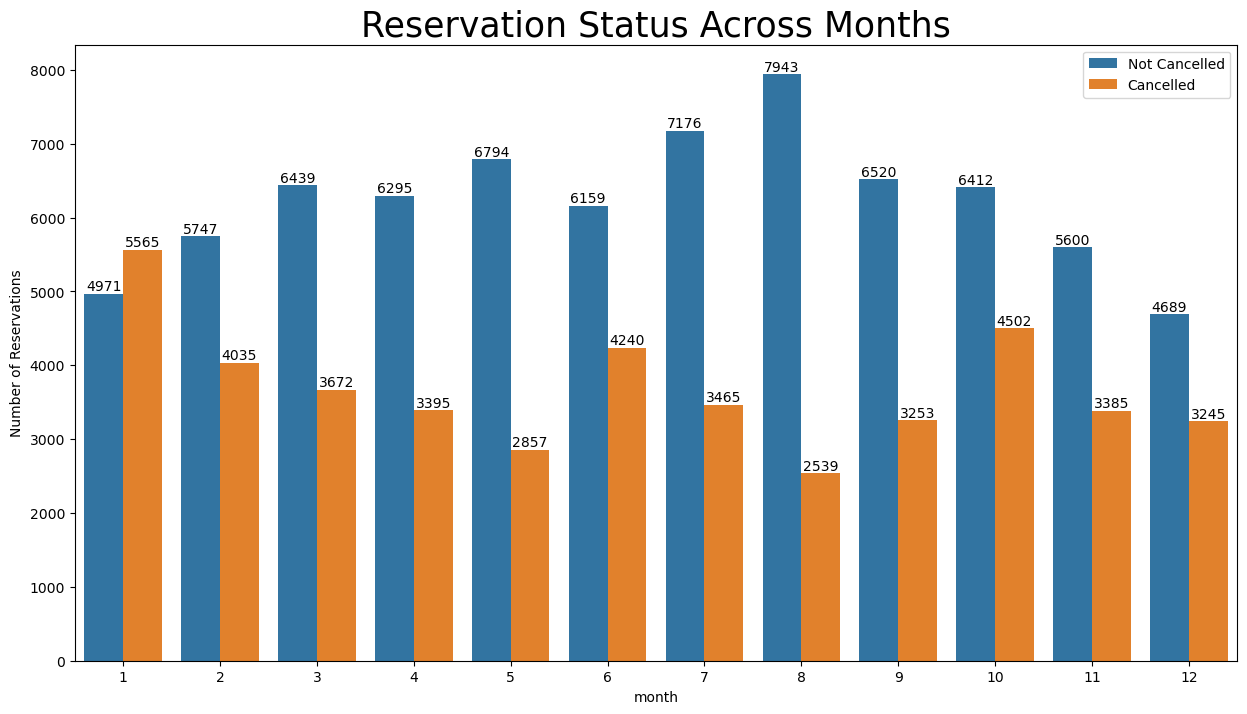

In [153]:
plt.figure(figsize = (15,8))
ax_1 = sns.countplot(data = data_1, x= "month", hue = "is_canceled")
for x in ax_1.containers :
    ax_1.bar_label(x)
plt.legend(["Not Cancelled","Cancelled"])
plt.title("Reservation Status Across Months",fontsize = 25)
plt.ylabel("Number of Reservations")
plt.show()

Now this is confusing insights as Jan having highest cancellation as well as the lower reservation so Rate would be the reason for the same

In [164]:
cancelled_data_month = data_1[data_1["is_canceled"]== 1].groupby("month")[["adr"]].sum().reset_index()

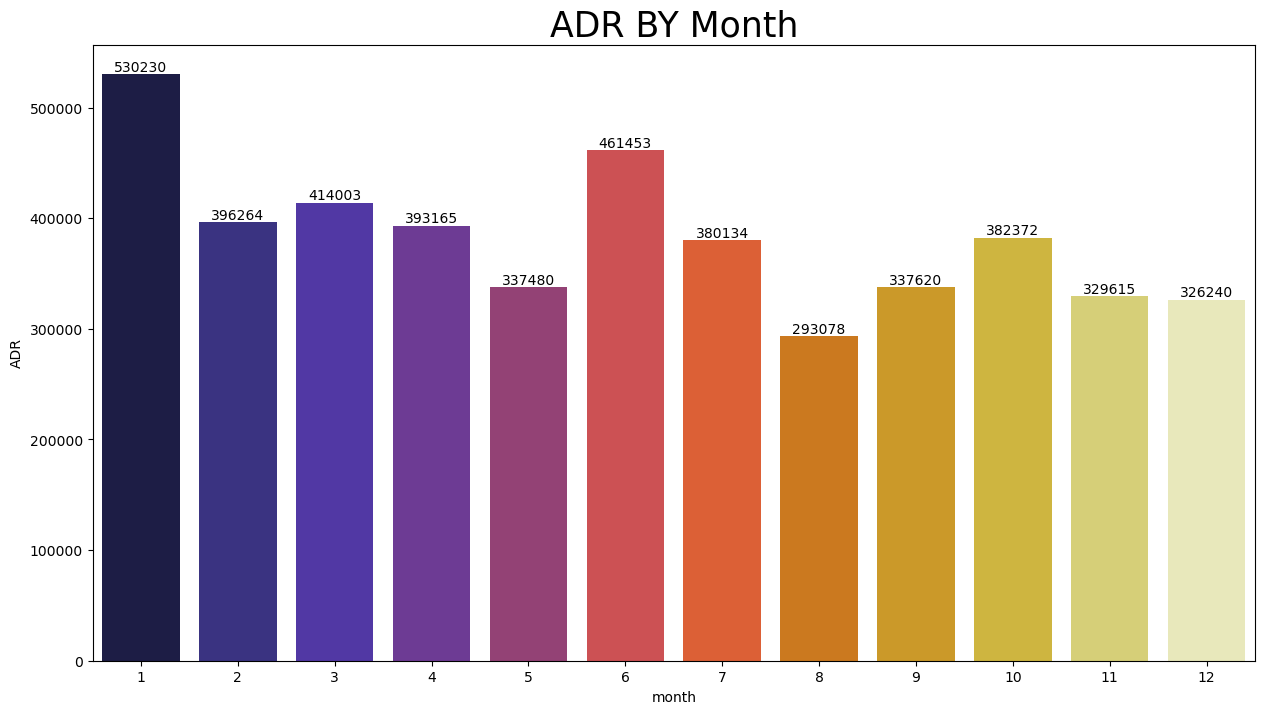

In [168]:
plt.figure(figsize = (15,8))
ax_1 = sns.barplot(data = cancelled_data_month, x= "month",y="adr",palette = "CMRmap")
for x in ax_1.containers :
    ax_1.bar_label(x)
plt.title("ADR BY Month",fontsize = 25)
plt.ylabel("ADR")
plt.show()

So Now we can retrieve that Jan Month having the highest ADR that is the reason like high price people cancelled the most in the month of Jan
they booked the hotel but at the last moment change their hotel who is giving less price as compare to our hotel. Same scenario we can see for 
Aug month data where the ADR is low and that's the reason for low cancellations in that month so price is the factor and that proves our hypothesis
True as well

# Top 10 Countries Cancellation Status

In [186]:
cancelled_data = data_1[data_1["is_canceled"]==1]

In [188]:
top_10_countries = cancelled_data["country"].value_counts()[:10]

In [190]:
top_10_countries

country
PRT    27515
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64

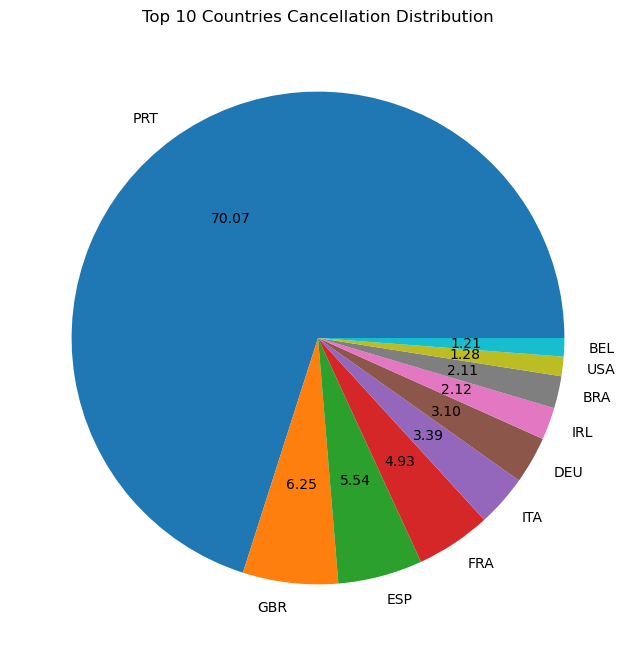

In [205]:
plt.figure(figsize = (8,8))
plt.pie(x = top_10_countries,labels=top_10_countries.index,autopct = "%.2f")
plt.title("Top 10 Countries Cancellation Distribution")
plt.show()

# Client Distribution

In [208]:
data_1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

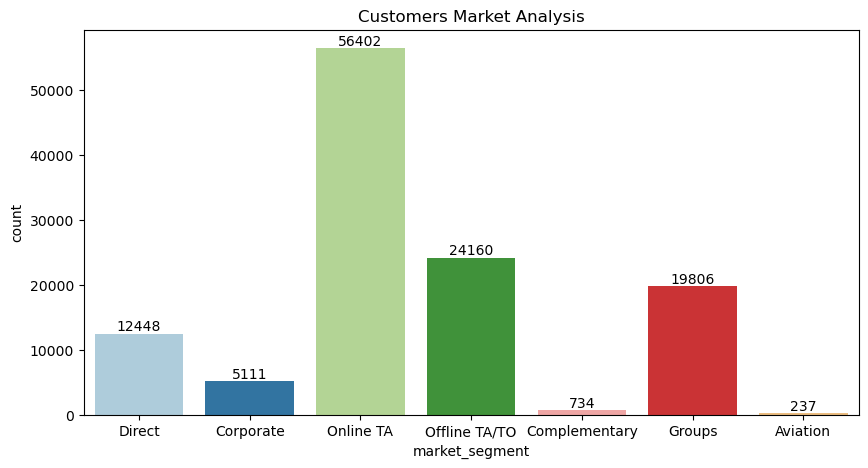

In [222]:
plt.figure(figsize = (10,5))
ax_1 = sns.countplot(data = data_1, x="market_segment",palette = "Paired")
for x in ax_1.containers:
    ax_1.bar_label(x)
plt.title("Customers Market Analysis")
plt.show()

So here we can retrieve that our customers are mostly coming from Online it also disproved our hypothesis that our customers are coming from Offline
Segment

# Cancelled data customer contribution

In [226]:
cancelled_data["market_segment"].value_counts(normalize=True)

market_segment
Online TA        0.469685
Groups           0.273979
Offline TA/TO    0.187484
Direct           0.043485
Corporate        0.022150
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

Here we can see the the cancellation rate is high for customers coming through Online travel agent

In [231]:
not_cancelled_data = data_1[data_1["is_canceled"]== 0]

In [239]:
cancelled_df_adr = cancelled_data.groupby(["reservation_status_date"]).agg({"adr":"mean"}).sort_values(by="reservation_status_date",ascending=False)

In [237]:
not_cancelled_df_adr = not_cancelled_data.groupby(["reservation_status_date"]).agg({"adr":"mean"}).sort_values(by="reservation_status_date",ascending=False)

In [251]:
cancelled_df_adr.reset_index(inplace=True)

In [261]:
not_cancelled_df_adr.reset_index(inplace=True)

In [255]:
cancelled_df_adr.head()

,reservation_status_date,adr
0,2017-12-08,176.200000
1,2017-12-07,160.111111
2,2017-12-06,168.441860
3,2017-12-05,113.430556
4,2017-12-04,141.129032


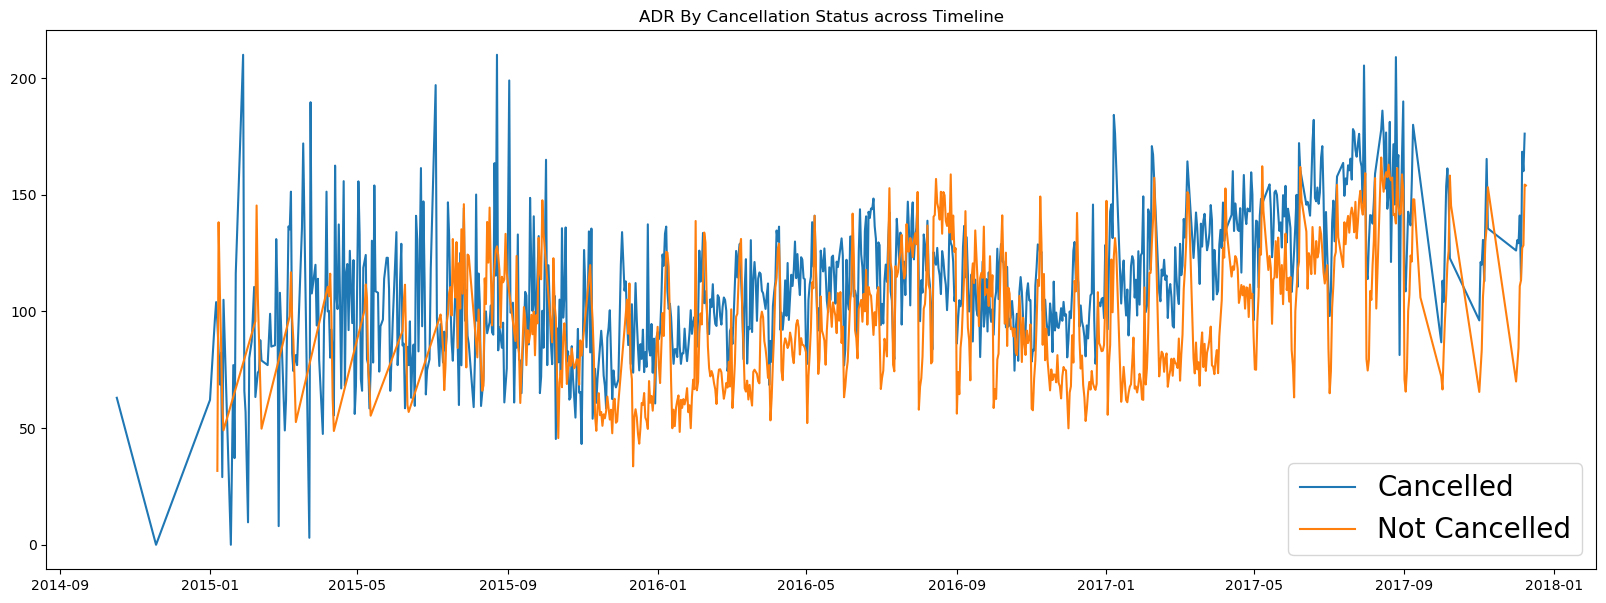

In [271]:
plt.figure(figsize = (20,7))
plt.plot(cancelled_df_adr["reservation_status_date"],cancelled_df_adr["adr"],label = "Cancelled")
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr["adr"],label = "Not Cancelled")
plt.legend(fontsize = 20)
plt.title("ADR By Cancellation Status across Timeline")
plt.show()

Their is inconsistency in this line chart because before 2016 and after 2017 we are having less data so we just take the data after 2016 and before 
2017

In [276]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr["reservation_status_date"] > "2016") & ( cancelled_df_adr["reservation_status_date"] < "2017")]

In [278]:
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr["reservation_status_date"] > "2016") & ( not_cancelled_df_adr["reservation_status_date"] < "2017")]

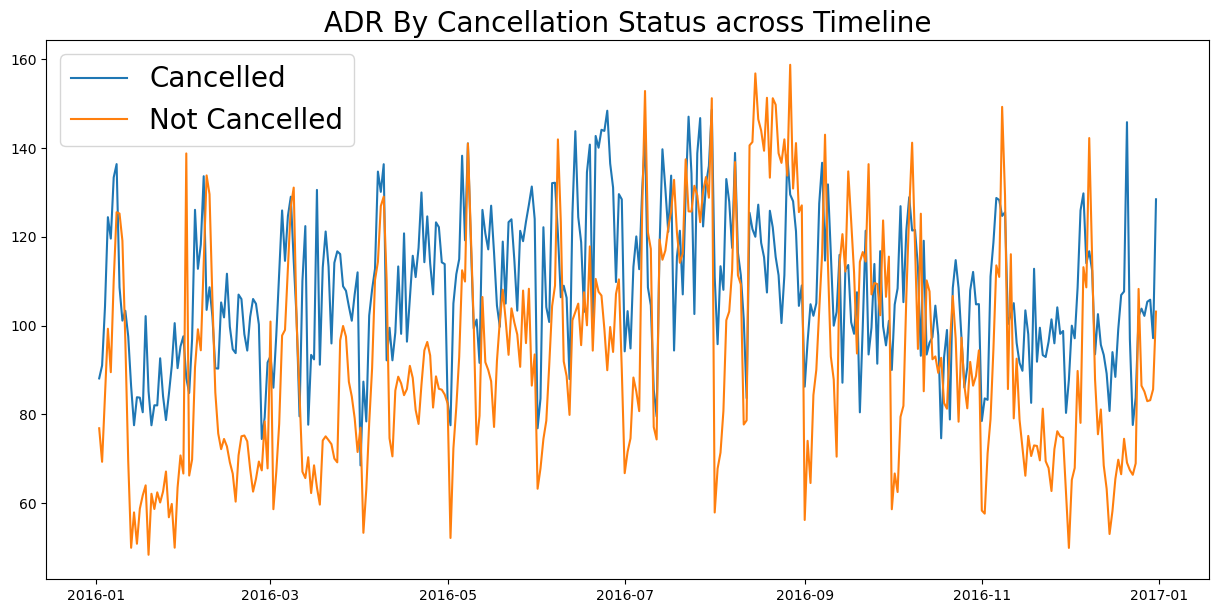

In [282]:
plt.figure(figsize = (15,7))
plt.plot(cancelled_df_adr["reservation_status_date"],cancelled_df_adr["adr"],label = "Cancelled")
plt.plot(not_cancelled_df_adr["reservation_status_date"],not_cancelled_df_adr["adr"],label = "Not Cancelled")
plt.legend(fontsize = 20)
plt.title("ADR By Cancellation Status across Timeline",fontsize=20)
plt.show()